In [0]:
print('Welcome to the Machine Learning for EEG Analysis Workshop - IERASG 2019')

Welcome to the Machine Learning for EEG Analysis Workshop - IERASG 2019


# Coding a Neuron

Numpy is popular and powerfull computing library in Python (helps to do m)

In [0]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 0
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


# Training a Neural Network
An Example: Feedforward

In [0]:
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


# Code: MSE Loss

In [0]:
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5


0.5


In [0]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

In [0]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M


NameError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

# List files to make sure we're in the expected directory.
# Your output will look different, showing your own Drive files here.
!ls
!pwd

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

In [0]:
plt.ioff()
caep = sio.loadmat('gdrive/My Drive/Colab Notebooks/IERASG_WS2019/caep.mat')
# caep = sio.loadmat('caep.mat')
list_features = np.arange(1,63)

In [0]:

# =============================================================================
# caep_df = pd.DataFrame(caep['mat'].T, columns = list_features)
# caep_df["response_type"] = np.squeeze(caep['out_mat'].T, axis=1)
# =============================================================================

X = caep['mat'].T
y = np.squeeze(caep['out_mat'].T, axis=1)
# y_2 provides information about the sensensation level of the CAEP recorded
# 0 = no stim; 1 = 10 dB SL; 2 = 20 dB SL; 3 = 40 dB SL
# y_2 = np.squeeze(caep['out_mat_2'].T, axis=1)

print(X.shape)
print(y.shape)


(10341, 62)
(10341,)
[1 1 1 ... 1 1 1]


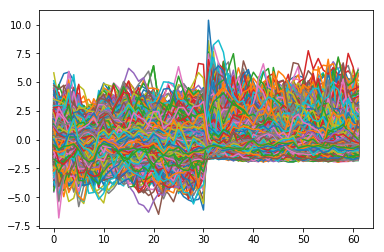

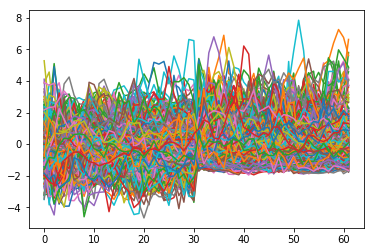

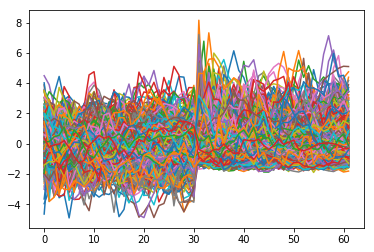

In [0]:
n_classes = 1
test_size = np.round(0.2*X.shape[0]).astype(np.int64)  # test set size to use
half_test_size = np.round(0.1*X.shape[0]).astype(np.int64) 

# Indices of the test set
# test_ind = np.random.choice(X.shape[0], test_size, replace=False)
selection = np.squeeze(caep['selection_2'].T, axis=1).astype(np.int32)
test_ind = selection[:test_size]
test_selection = test_ind[:half_test_size]
val_selection = test_ind[half_test_size:]

X_val = X[val_selection, :]
y_val = y[val_selection]

X_test = X[test_selection, :]
y_test = y[test_selection]

X_train = np.delete(X, test_ind, axis=0) # remove test_ind rows
y_train = np.delete(y, test_ind)

X_test.shape # (2068, 62)
X_train.shape # (6205, 62)

X_train_n = X_train
X_test_n = X_test
X_val_n = X_val

# normalize feature data
MEAN = np.mean(X_train_n, axis=0)
STD = np.std(X_train_n, axis=0)
X_train_n = (X_train_n - MEAN) / STD
X_test_n = (X_test_n - MEAN) / STD
X_val_n = (X_val_n - MEAN) / STD

plt.plot(X_train_n.T)
plt.show()
plt.plot(X_test_n.T)
plt.show()
plt.plot(X_val_n.T)
plt.show()




In [0]:
print(selection)
plt.plot(X_train_n[y==1,0:31].T)
plt.show()

[4901 8919 5918 ... 4098 9718  453]


IndexError: ignored

# Hyper-parameters setup 

Note that it is usual to at least centre the data (subtract the mean for each feature from each value for that feature) but for simplicity let's leave the data as it is

In [0]:
y_train_mat = y_train
y_val_mat = y_val
y_test_mat = y_test


n_hidden = 20  # number of units in hidden layer
batch_size = 100
epochs = 100

# Learning rate
lrate = 0.0001

# Regularisation coefficient
reg = 0.001

# Neural Network setup using Keras

In [0]:
nn1 = Sequential()
nn1.add(Dense(n_hidden, input_dim = X_train_n.shape[1],
             activation = "relu",
             kernel_regularizer = keras.regularizers.l2(reg)))

nn1.add(Dense(n_classes, activation = "sigmoid"))
nn1.summary()

nn1.compile(loss = "binary_crossentropy",
            optimizer = "rmsprop",
            metrics = ["accuracy"])

nn1.compile(loss = "binary_crossentropy",
            metrics = ["accuracy"],
           optimizer = keras.optimizers.RMSprop(lr = lrate))


hist1 = nn1.fit(x = X_train_n, y = y_train_mat,
                batch_size = batch_size, epochs = epochs,
                verbose = 1,
                validation_data = (X_val_n, y_val_mat))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                1260      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
Train on 8273 samples, validate on 1034 samples
Epoch 1/100
8273/8273 [==============================] - 0s 60us/step - loss: 1.0375 - acc: 0.5260 - val_loss: 1.0085 - val_acc: 0.5600
Epoch 2/100
8273/8273 [==============================] - 0s 18us/step - loss: 0.9665 - acc: 0.5894 - val_loss: 0.9477 - val_acc: 0.6170
Epoch 3/100
8273/8273 [==============================] - 0s 20us/step - loss: 0.9100 - acc: 0.6456 - val_loss: 0.8951 - val_acc: 0.6567
Epoch 4/100
8273/8273 [==============================] - 0s 18us/step - loss: 0.

# Plot the Accuracy as a function of the epoch number

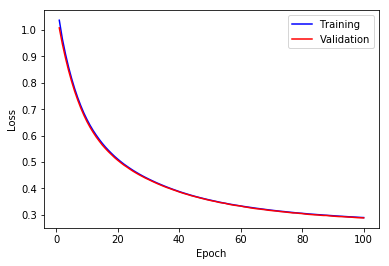

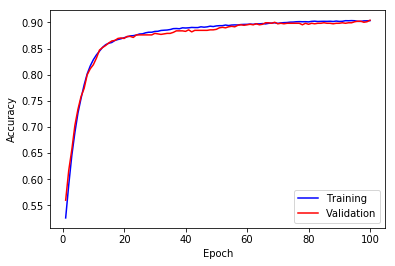

1034/1034 [==============================] - 0s 24us/step


0.8965183752417795

In [0]:
# Plot of loss vs epoch number for training and validation
plt.plot(np.array(hist1.epoch) + 1, hist1.history["loss"],
         c = "blue")
plt.plot(np.array(hist1.epoch) + 1, hist1.history["val_loss"],
         c = "red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show()

# Plot of accuracy vs epoch number for training and validation
plt.plot(np.array(hist1.epoch) + 1, hist1.history["acc"],
         c = "blue")
plt.plot(np.array(hist1.epoch) + 1, hist1.history["val_acc"],
         c = "red")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.show()

# Loss and accuracy on the test set
nn1.evaluate(X_test_n, y_test_mat)

# Predicted classes on the test set
nn1.predict_classes(X_test_n)

# Accuracy on the test set from the predicted classes
np.mean(np.squeeze(nn1.predict_classes(X_test_n), axis=1) == y_test)

Train on 10341 samples, validate on 1034 samples
Epoch 1/500
10341/10341 [==============================] - 1s 70us/step - loss: 1.5022 - acc: 0.3640 - val_loss: 1.4038 - val_acc: 0.4449
Epoch 2/500
10341/10341 [==============================] - 0s 23us/step - loss: 1.3432 - acc: 0.4960 - val_loss: 1.2668 - val_acc: 0.5445
Epoch 3/500
10341/10341 [==============================] - 0s 22us/step - loss: 1.2310 - acc: 0.5625 - val_loss: 1.1608 - val_acc: 0.5899
Epoch 4/500
10341/10341 [==============================] - 0s 22us/step - loss: 1.1459 - acc: 0.6015 - val_loss: 1.0779 - val_acc: 0.6315
Epoch 5/500
10341/10341 [==============================] - 0s 20us/step - loss: 1.0843 - acc: 0.6269 - val_loss: 1.0196 - val_acc: 0.6509
Epoch 6/500
10341/10341 [==============================] - 0s 20us/step - loss: 1.0404 - acc: 0.6421 - val_loss: 0.9773 - val_acc: 0.6731
Epoch 7/500
10341/10341 [==============================] - 0s 20us/step - loss: 1.0092 - acc: 0.6527 - val_loss: 0.9488 - v

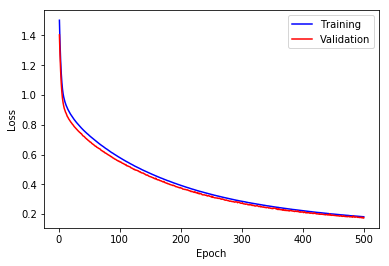

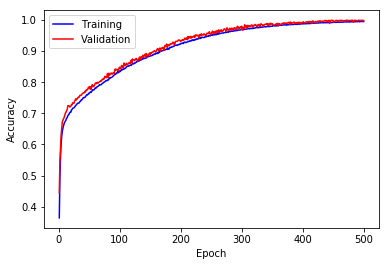

Saved model NET3 to disk
1034/1034 [==============================] - 0s 25us/step


0.9932301740812379

In [0]:
list_features = np.arange(1,63)

X = caep['mat'].T

# The sensation level is encoded in out_mat_2
# 0 is non - stim; 1 is 10dB; 2 is 20dB; 3 is 40dB SL
y = np.squeeze(caep['out_mat_2'].T, axis=1)

y = keras.utils.to_categorical(y,4)

n_classes = 4
test_size = np.round(0.2*X.shape[0]).astype(np.int64)  # test set size to use
half_test_size = np.round(0.1*X.shape[0]).astype(np.int64) 
# Indices of the test set
# test_ind = np.random.choice(X.shape[0], test_size, replace=False)
selection = np.squeeze(caep['selection_2'].T, axis=1).astype(np.int32)
test_ind = selection[:test_size]
test_selection = test_ind[:half_test_size]
val_selection = test_ind[half_test_size:]

X_val = X[val_selection, :]
y_val = y[val_selection]

X_test = X[test_selection, :]
y_test = y[test_selection]

X_train = X
#X_train = np.delete(X, test_ind, axis=0) # remove test_ind rows
y_train = y
#y_train = np.delete(y, test_ind)

X_train_n = X_train
X_test_n = X_test
X_val_n = X_val

# normalize feature data
MEAN = np.mean(X_train_n, axis=0)
STD = np.std(X_train_n, axis=0)
X_train_n = (X_train_n - MEAN) / STD
X_test_n = (X_test_n - MEAN) / STD
X_val_n = (X_val_n - MEAN) / STD

if 0:
    plt.plot(X_train_n.T)
    plt.show()
    plt.plot(X_test_n.T)
    plt.show()
    plt.plot(X_val_n.T)
    plt.show()

y_train_mat = y_train
y_val_mat = y_val
y_test_mat = y_test

train_NET3 = 1

#########
# NET3: #
#########
if train_NET3:

    n_hidden1 = 100
    n_hidden2 = 100

    batch_size = 100
    epochs = 500
    lrate = 0.0001
    reg = 0.001

    nn = Sequential()

    nn.add(Dense(n_hidden1, input_dim = X_train_n.shape[1],
                 activation = "relu",
                 kernel_regularizer = keras.regularizers.l2(reg)))
    nn.add(Dense(n_hidden2, activation = "relu",
                 kernel_regularizer = keras.regularizers.l2(reg)))
    nn.add(Dense(n_classes, activation = "softmax"))

    nn.compile(loss = "categorical_crossentropy",
                metrics = ["accuracy"],
               optimizer = keras.optimizers.RMSprop(lr = lrate))

    hist2 = nn.fit(x = X_train_n, y = y_train_mat,
                    batch_size = batch_size,
                    epochs = epochs, verbose = 1,
                    validation_data = (X_val_n, y_val_mat))

    # Plot of loss vs epoch number for training and validation
    plt.plot(np.array(hist2.epoch) + 1, hist2.history["loss"],
             c="blue")
    plt.plot(np.array(hist2.epoch) + 1, hist2.history["val_loss"],
             c="red")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.show()

    # Plot of accuracy vs epoch number for training and validation
    plt.plot(np.array(hist2.epoch) + 1, hist2.history["acc"],
             c="blue")
    plt.plot(np.array(hist2.epoch) + 1, hist2.history["val_acc"],
             c="red")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training", "Validation"])
    plt.show()

    # serialize model to JSON
    model_json = nn.to_json()
    with open("nn.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
        nn.save_weights("NET3.h5")
    print("Saved model NET3 to disk")

else:
    # load weights into new model
    loaded_model.load_weights("NET3.h5")
    print("Loaded model NET3 from disk")
    nn = loaded_model

# Loss and accuracy on the test set
out = nn.evaluate(X_test_n, y_test_mat)

# Predicted classes on the test set
nn.predict_classes(X_test_n)

# Accuracy on the test set from the predicted classes
np.mean(nn.predict_classes(X_test_n) == np.argmax(y_test,axis=1))


# 2(a) Fit a fully-connected neural network with two hidden
layers, with the first hidden layer having 30 units and the
second hidden layer having 10 units.
Use relu activation for both hidden layers.
Use a batch size of 100 and train for 300 epochs.
Use the keras.regularizer and adjut the learning rate.
Remember that you have to specify the input dimension for
the first hidden layer only.

2(b) Use the evaluate() method to calculate the accuracy on the test set.

2(c) Use the predict_classes() method to get the predicted classes on the test set.

2(d) Use the predicted classes from (c) to calculate the accuracy on the test set.

2(e) Plot loss vs epoch for the training and validation sets on the same graph. What does the plot suggest?

2(f) Plot accuracy vs epoch for the training and validationsets on the same graph.

Train on 8273 samples, validate on 1034 samples
Epoch 1/100
8273/8273 [==============================] - 0s 52us/step - loss: 1.1823 - acc: 0.6144 - val_loss: 1.1570 - val_acc: 0.6451
Epoch 2/100
8273/8273 [==============================] - 0s 20us/step - loss: 1.1179 - acc: 0.6779 - val_loss: 1.0988 - val_acc: 0.7099
Epoch 3/100
8273/8273 [==============================] - 0s 18us/step - loss: 1.0604 - acc: 0.7211 - val_loss: 1.0469 - val_acc: 0.7282
Epoch 4/100
8273/8273 [==============================] - 0s 19us/step - loss: 1.0100 - acc: 0.7505 - val_loss: 0.9995 - val_acc: 0.7495
Epoch 5/100
8273/8273 [==============================] - 0s 19us/step - loss: 0.9647 - acc: 0.7729 - val_loss: 0.9553 - val_acc: 0.7679
Epoch 6/100
8273/8273 [==============================] - 0s 16us/step - loss: 0.9230 - acc: 0.7904 - val_loss: 0.9143 - val_acc: 0.7834
Epoch 7/100
8273/8273 [==============================] - 0s 15us/step - loss: 0.8843 - acc: 0.8050 - val_loss: 0.8755 - val_acc: 0.8037


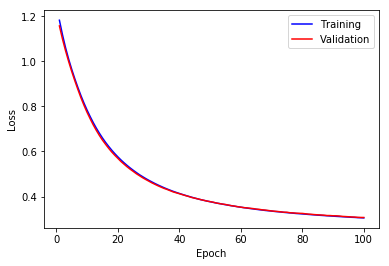

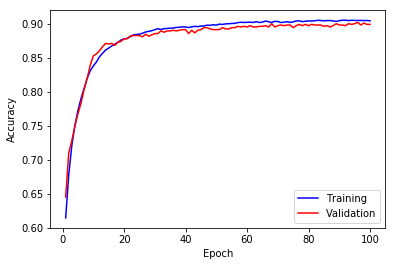

1034/1034 [==============================] - 0s 40us/step


0.8994197292069632

In [0]:


n_hidden1 = 30
n_hidden2 = 10
batch_size = 100
epochs = 100

# Learning rate
lrate = 0.0001

# Regularisation coefficient
reg = 0.01

nn2 = Sequential()

nn2.add(Dense(n_hidden1, input_dim = X_train_n.shape[1],
             activation = "relu",
             kernel_regularizer = keras.regularizers.l2(reg)))
nn2.add(Dense(n_hidden2, activation = "relu",
             kernel_regularizer = keras.regularizers.l2(reg)))
nn2.add(Dense(n_classes, activation = "sigmoid"))

# =============================================================================
# nn2.compile(loss = "binary_crossentropy",
#             optimizer = "rmsprop",
#             metrics = ["accuracy"])
# =============================================================================

nn2.compile(loss = "binary_crossentropy",
            metrics = ["accuracy"],
           optimizer = keras.optimizers.RMSprop(lr = lrate))

hist2 = nn2.fit(x = X_train_n, y = y_train_mat,
                batch_size = batch_size,
                epochs = epochs, verbose = 1,
                validation_data = (X_val_n, y_val_mat))

# Plot of loss vs epoch number for training and validation
plt.plot(np.array(hist2.epoch) + 1, hist2.history["loss"],
         c = "blue")
plt.plot(np.array(hist2.epoch) + 1, hist2.history["val_loss"],
         c = "red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show()

# Training loss decreasing below the validation loss suggests
# overfitting.

# Plot of accuracy vs epoch number for training and validation
plt.plot(np.array(hist2.epoch) + 1, hist2.history["acc"],
         c = "blue")
plt.plot(np.array(hist2.epoch) + 1, hist2.history["val_acc"],
         c = "red")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.show()

# Loss and accuracy on the test set
nn2.evaluate(X_test_n, y_test_mat)

# Predicted classes on the test set
nn2.predict_classes(X_test_n)

# Accuracy on the test set from the predicted classes
np.mean(np.squeeze(nn2.predict_classes(X_test_n), axis=1) == y_test)
